In [1]:
#import relevant packages for analysis

from __future__ import print_function

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

PROJ_ROOT = os.path.join(os.pardir)

sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")

In [2]:
%load_ext watermark
%watermark -a "Bryan Dickinson" -d -t -v -p numpy,pandas

Bryan Dickinson 2019-09-17 04:46:12 

CPython 3.7.3
IPython 7.7.0

numpy 1.16.4
pandas 0.25.0


***Problem Statement***

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

**Variable Definition**

**User_ID:** User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:** Age in bins

**Occupation:**	Occupation (Masked)

**City_Category:**	Category of the City (A,B,C)

**Stay_In_Current_City_Years:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**Product_Category_1:**	Product Category (Masked)

**Product_Category_2:**	Product may belongs to other category also (Masked)

**Product_Category_3:**	Product may belongs to other category also (Masked)

**Purchase:**	Purchase Amount (Target Variable)




In [3]:
customer_path = os.path.join(PROJ_ROOT, 
                         'data', 'processed',
                         'clean_data.csv')
data = pd.read_csv(customer_path,dtype={'User_ID':'category','Product_ID':'category',
                                    'Marital_Status':'category','Gender':'category',
                                    'Age': 'category', 'Occupation':'category', 
                                    'Product_Category_1': 'category',
                                    'Product_Category_2': 'category', 
                                    'Product_Category_3':'category', 
                                    'City_Category': 'category', 
                                    'Stay_In_Current_City_Years': 'category'} )

# Inferential Statistics

Convert the variables to numeric vales to perform statistics. Also perform some feature engineering to create new statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null category
Product_ID                    550068 non-null category
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
Purchase                      550068 non-null int64
dtypes: category(11), int64(1)
memory usage: 11.4 MB


In [5]:
ndf = data.copy(deep = True)

In [6]:

def split_mean(x):
    '''A function to split the Age bins and return the mean of the two numbers'''
    if '-' in x:
        split_list = x.split('-')
        mean = (float(split_list[0]) + float(split_list[1]))/2
    else:
        mean = 55
    
    return mean


def clean_city_yr(x):
    ''' A function to clean the stay in curren city years feature by removing the non-numeric symobol'''
    #if x == NaN:
        
    num = x.split('+')[0]
  
    return int(num)


def fill_p_means(x):
    '''function to insert the mean of a category purchase'''
    #if the product category is in the list of means, insert the mean value
    if x in all_cat_means.index:
        return pd.Series(int(x)).replace(all_cat_means.to_dict())[0]
    else : #else if the category is not listed, return the overall mean of the purchase data
        return cat_p_means

def fill_p_id_means(x):
    '''function to return the mean of each purchase id'''
    if x in np.asarray(ndf['Product_ID'].unique()):
        return pd.Series(x).replace(p_id_means.to_dict())[0]
    else:
        return p_means

In [7]:
#create an Age column with the mean of the Age bins
ndf['_Age'] = ndf.Age.apply(lambda x: split_mean(x))

#Create a labels for the Gender and Occupation features using .cat.odes
ndf['Gender'] = ndf['Gender'].cat.codes
ndf['Occupation'] = ndf['Occupation'].cat.codes

#Use get_dummies to create dummy features from the City_Category feature.
ndf = pd.get_dummies(ndf, columns = ['City_Category'], prefix = ['City'])

#clean the city years feature
ndf['_City_Yr'] = ndf.Stay_In_Current_City_Years.apply(lambda x: clean_city_yr(x))

#convert the Marital Status & product category, age, and city years features from a category to a numeric type
cats = list(ndf.select_dtypes(include = {'category'}).columns)
del cats[1]
del cats[1]
del cats[1]
#convert stay_in_current_city_years to a numeric feature by removine the '+' in the data.
ndf[cats] = ndf[cats].apply(pd.to_numeric)  


ndf.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,_Age,City_A,City_B,City_C,_City_Yr
0,1000001,P00069042,0,0-17,2,2,0,3,NaN,NaN,8370,8.5,1,0,0,2
1,1000001,P00248942,0,0-17,2,2,0,1,6.0,14.0,15200,8.5,1,0,0,2
2,1000001,P00087842,0,0-17,2,2,0,12,NaN,NaN,1422,8.5,1,0,0,2
3,1000001,P00085442,0,0-17,2,2,0,12,14.0,NaN,1057,8.5,1,0,0,2
4,1000002,P00285442,1,55+,8,4+,0,8,NaN,NaN,7969,55.0,0,0,1,4


In [8]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null category
Gender                        550068 non-null int8
Age                           550068 non-null category
Occupation                    550068 non-null int8
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
_Age                          550068 non-null float64
City_A                        550068 non-null uint8
City_B                        550068 non-null uint8
City_C                        550068 non-null uint8
_City_Yr                      550068 non-null int64
dtypes: category(3), float64(3), int64(5), i

## Feature Engineering

In [9]:
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])
#capture the mean of all purchases
cat_p_means = df.Purchase.mean()
df = df.set_index('Product_Categories')

#record a mean for each product category
all_cat_means = df.groupby('Product_Categories').mean()

all_cat_means = pd.Series(data = all_cat_means['Purchase'], index = all_cat_means.index )


In [10]:
%%time
#fill the means for the product categories
ndf['Product_Category_mean'] = ndf.Product_Category_1.apply(fill_p_means)


Wall time: 12min 5s


In [11]:
%%time
p_means = ndf.Purchase.mean() #mean of all purchases
p_id_means = ndf.groupby('Product_ID').Purchase.mean() #group by product ids
p_id_means = pd.Series(data = p_id_means.values, index = p_id_means.index ) #return the mean of each product id
ndf['Product_ID_mean'] = ndf.Product_ID.apply(fill_p_id_means) #fill in the df the mean of each product ID


Wall time: 10min 14s


In [12]:
%%time
#Take the User, product, and product category means and map them to their corresponding purchases

user_count = ndf.User_ID.value_counts()
avg_user_c = ndf.User_ID.value_counts().sum() / ndf.User_ID.nunique()

def fill_u_counts(x):
    if x in np.asarray(ndf['User_ID'].unique()):
        return pd.Series(int(x)).replace(user_count.to_dict())[0]
    else:
        return avg_user_c
    
ndf['User_ID_count'] = ndf.User_ID.apply(fill_u_counts)

Wall time: 1d 12h 41min 34s


In [13]:
#create the path for the new file
customer_data_new_features = os.path.join(PROJ_ROOT, 
                         'data', 'processed',
                         'feat_data.csv')

ndf.to_csv(customer_data_new_features, index = False)

In [14]:
#select the new, only numeric features

new_df = ndf[['User_ID', 'Gender', 'Occupation', 
             'Marital_Status', '_Age','City_A','City_B','City_C','_City_Yr', 'Product_Category_mean',
             'Product_ID_mean', 'User_ID_count', 'Purchase']]



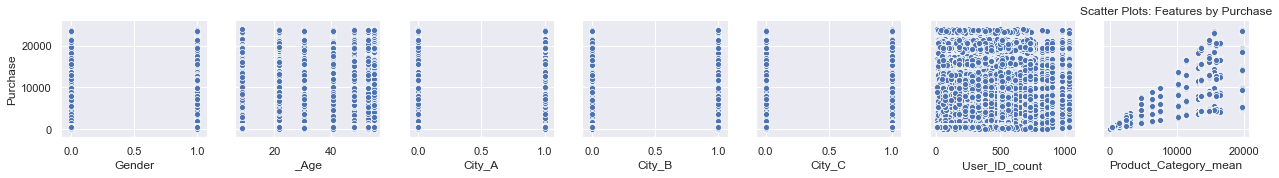

In [15]:
sns.set_context('notebook')
#s_new_df = new_df[['User_ID', 'Gender', 'Occupation','Marital_Status','_Age','City_A']]
sns.pairplot(new_df,x_vars=['Gender','_Age','City_A','City_B','City_C', 
                            'User_ID_count','Product_Category_mean'], y_vars = ['Purchase'])
_=plt.title('Scatter Plots: Features by Purchase')

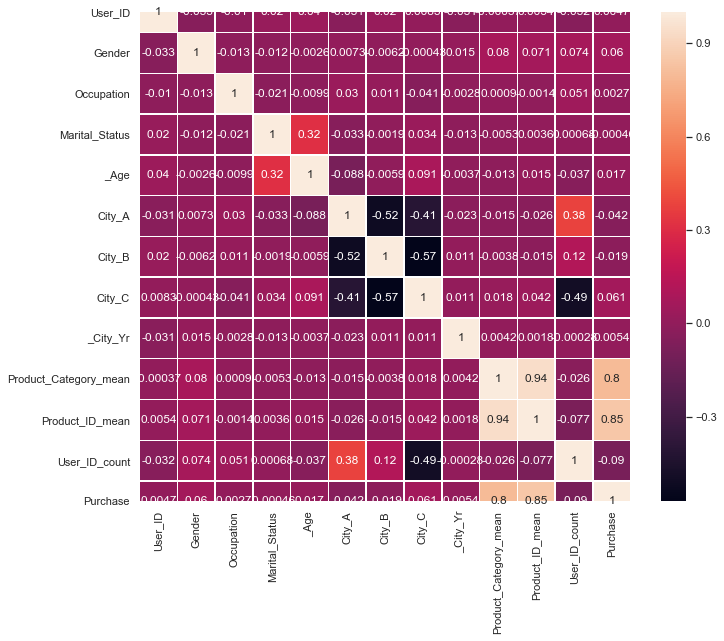

In [17]:
#generate correlation
corr = new_df.corr()

fig, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(corr, linewidths = .5, annot = True )

It's hard to see any strong positive correlations from the features. The high correlations observed are among Purchase amounts and a features created with that variable (avg price of the product, or avg price of the category). 

There are some negative correlations that have been found. It appears that there is a negative correlation between Users from City_C and the number of products purchased (User_ID_count).

There is a small positive correlation between City_A and number or products purchased. 

It also appears that there is a small positive correlation between Age and Marital status. 

